# Text vectorization and term frequency analysis

In the previous notebook, 'jneuro.csv' was imported, cleaned and saved as 'jneuro_clean.csv'.
Here, we'll use nltk library to normalize the preprocessed text. Then, we will vectorize the texts parsed by its publiation year using scikit-learn library. Finally, we will analyze term frequency to conclude what are the most frequently appeared words.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='coolwarm')
sns.set_style("darkgrid")
sns.despine()
sns.set_context(rc={'axes.labelsize':20,
                    'axes.titlesize':25,
                    'font.size':15,
                    'legend.fontsize':15,
                    'lines.linewidth':2.2})

import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords', 'wordnet'])

[nltk_data] Downloading package stopwords to /home/hyoj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hyoj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('../data/jneuro_clean.csv', index_col=0)
print(df.shape)
df.head()

(11893, 8)


,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0


Since we are interested in the 'most frequent terms of the year', let's start with parsing the data by publication year.<br>
However, somehow the 'publciation_date' column was not saved as the datetime format.

In [3]:
df.dtypes

pubmed_id            object
title                object
abstract             object
keywords             object
publication_date     object
authors              object
len_title           float64
len_abstract        float64
dtype: object

So we need to convert it again

In [4]:
# Before converting dtype of'publication_date'
print(df['publication_date'].dtype)

# Convert the date type to datetime64
df['publication_date'] = pd.to_datetime(df['publication_date'])

# After converting dtype of'publication_date'
print(df['publication_date'].dtype)

object
datetime64[ns]


Here, we create a new column called 'publication_year' to group the data using this field later.

In [5]:
df['publication_year'] = df['publication_date'].dt.year
df.head()

,pubmed_id,title,abstract,keywords,publication_date,authors,len_title,len_abstract,publication_year
2,32737167,The neocortical progenitor specification progr...,Neuronal progenitors in the developing forebra...,NaN,2020-08-02,"[{'lastname': 'Yabut', 'firstname': 'Odessa R'...",117.0,767.0,2020
3,32732324,Flexible coordinator and switcher hubs for ada...,Functional connectivity studies have identifie...,NaN,2020-08-01,"[{'lastname': 'Cocuzza', 'firstname': 'Carrisa...",65.0,1645.0,2020
4,32727820,Responses to Visual Speech in Human Posterior ...,Experimentalists studying multisensory integra...,NaN,2020-07-31,"[{'lastname': 'Metzger', 'firstname': 'Brian A...",103.0,1664.0,2020
5,32727819,Activation of Infralimbic to Nucleus Accumbens...,Hedonic processing plays an integral role in d...,NaN,2020-07-31,"[{'lastname': 'Hurley', 'firstname': 'Seth W',...",121.0,1421.0,2020
6,32719163,Hippocampal representation of threat features ...,Decisions under threat are crucial to survival...,NaN,2020-07-29,"[{'lastname': 'Abivardi', 'firstname': 'Aslan'...",111.0,1823.0,2020


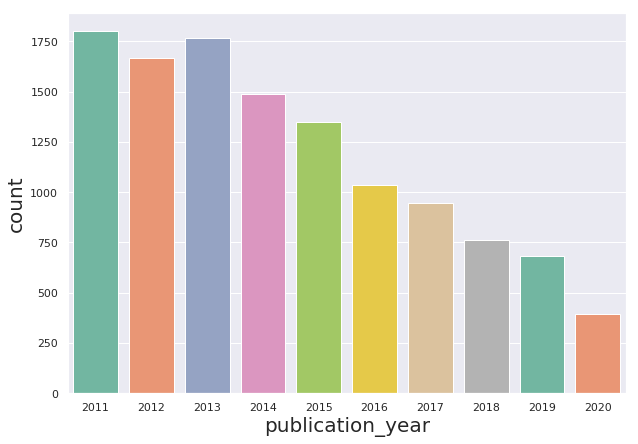

In [6]:
plt.figure(figsize=(10,7))
sns.countplot(df['publication_year'], palette='Set2')

# 1. Parse the data by year of its publication

Using groupby method, we'll gather all the abstracts of each year as one large string element.

In [7]:
abstracts_per_year = df.groupby('publication_year')['abstract'].sum()
abstracts_per_year

publication_year
2011    RPE65 is an abundantly expressed protein withi...
2012    Peripheral immune cells and brain microglia ex...
2013    erbb4 is a susceptibility gene for schizophren...
2014    Presynaptic kainate-type glutamate receptors (...
2015    Emerging evidence has indicated that the patho...
2016    Comprehending speech involves the rapid and op...
2017    Spinal cord injury (SCI) induces a centralized...
2018    Overreactivity and defensive behaviors in resp...
2019    In the retina of zebrafish, Müller glia have t...
2020    Neuronal progenitors in the developing forebra...
Name: abstract, dtype: object

In [8]:
# Check the length of the document per year

for i, val in enumerate(abstracts_per_year):
    vol_per_year = i+2011, len(val)
    print(f'Total length of the abstracts publicated in year {vol_per_year[0]} is {vol_per_year[1]}')

Total length of the abstracts publicated in year 2011 is 2715079
Total length of the abstracts publicated in year 2012 is 2510295
Total length of the abstracts publicated in year 2013 is 2662309
Total length of the abstracts publicated in year 2014 is 2255663
Total length of the abstracts publicated in year 2015 is 2427824
Total length of the abstracts publicated in year 2016 is 2256093
Total length of the abstracts publicated in year 2017 is 1119085
Total length of the abstracts publicated in year 2018 is 838517
Total length of the abstracts publicated in year 2019 is 750208
Total length of the abstracts publicated in year 2020 is 455919


# 2. Text normalization

Before creating a bag of words representation of each string, we first need to transform the text into a single canonical form.
<br>
To this end, I'll adopt following methods/techniques: <br>
    - prepare a list of word tokens using *word_tokenizer*
    - lowercase all the tokens
    - keep alphanumeric tokens only
    - remove stopwords
    - extract lemmatized tokens using *WordNetLemmatizer*

In [9]:
# A function to extract the document from a specific year

def abstracts_from_year(num):
    for i, val in enumerate(abstracts_per_year):
        if i+2011 == num:
            return val

In [10]:
abstracts_from_year(2020)[:100]

'Neuronal progenitors in the developing forebrain undergo dynamic competence states to ensure timely '

In [11]:
# 1. English stopwords
stopwords_en = stopwords.words('english')

# 2. Common stopwords for literature
# (reference: https://www.ncbi.nlm.nih.gov/books/NBK3827/table/pubmedhelp.T.stopwords/)

stopwords_additional = ['about', 'again', 'all', 'almost', 'also', 'although', 'always', 'among',
                        'an', 'and', 'another', 'any', 'are', 'as', 'at', 'be', 'because', 'been',
                        'before', 'being', 'between', 'both', 'but', 'by', 'can', 'could', 'did',
                        'do', 'does', 'done', 'due', 'during', 'each', 'either', 'enough', 'especially',
                        'etc', 'for', 'found', 'from', 'further', 'had', 'has', 'have', 'having',
                        'here', 'how', 'however', 'i', 'if', 'in', 'into', 'investigate','is', 'it',
                        'its', 'itself', 'just', 'kg', 'km', 'made', 'mainly', 'make', 'may', 'mg',
                        'might', 'ml', 'mm', 'most', 'mostly', 'must', 'nearly', 'neither', 'no',
                        'nor', 'obtained', 'of', 'often', 'on', 'our', 'overall', 'perhaps', 'pmid',
                        'quite', 'rather', 'really', 'regarding', 'seem', 'seen', 'several', 'should',
                        'show', 'showed', 'shown', 'shows', 'significantly', 'since', 'so', 'some',
                        'such', 'suggest', 'than', 'that', 'the', 'their', 'theirs', 'them', 'then',
                        'there', 'therefore', 'these', 'they', 'this', 'those', 'through', 'thus',
                        'to', 'understand', 'understood', 'upon', 'use', 'used', 'using', 'various',
                        'very', 'was', 'we', 'were', 'what', 'when', 'whereas', 'which', 'while',
                        'with', 'within', 'without', 'would']

In [12]:
# A function to get a list of word tokens (unigrams)
# Normalization techniques to apply: Lowercasing, Alphanumeric only, Remove stopwords, Lemmatization

def get_tokens_normalized(text: str):
    # Instantiate word tokenizer
    tokenized = word_tokenize(text)

    # Get lowercased tokens using Tweet tokenizer
    tokens_list = [t.lower() for t in tokenized]
    
    # Retain alphanumeric words only
    alpha_only = [t for t in tokens_list if t.isalnum()]
    
    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in stopwords_en and t not in stopwords_additional]
    
    # Lemmatize
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    
    return lemmatized

Let's get an example of the output tokens:
    # 1. Extract a string element from year 2011-2020 by using the function 'abstracts_from_year'
    # 2. Get a list of normlized tokens using 'get_tokens_normalized'
    # 3. Print only the first 10 tokens as an example

In [13]:
tokens = {}
for year in range(2011, 2021):
    tokens[year] =  get_tokens_normalized(abstracts_from_year(year))[:10]
    
print(tokens)

{2011: ['rpe65', 'abundantly', 'expressed', 'protein', 'retinal', 'pigment', 'epithelium', 'rpe', 'eye', 'required'], 2012: ['peripheral', 'immune', 'cell', 'brain', 'microglia', 'exhibit', 'activated', 'phenotype', 'premanifest', 'huntington'], 2013: ['erbb4', 'susceptibility', 'gene', 'schizophrenia', 'erbb4', 'signal', 'hypothesized', 'function', 'number', 'cortical'], 2014: ['presynaptic', 'glutamate', 'receptor', 'kars', 'regulate', 'glutamate', 'release', 'probability', 'plasticity', 'area'], 2015: ['emerging', 'evidence', 'indicated', 'pathogenesis', 'neuropathic', 'pain', 'mediated', 'spinal', 'neural', 'plasticity'], 2016: ['comprehending', 'speech', 'involves', 'rapid', 'optimally', 'efficient', 'mapping', 'sound', 'meaning', 'influential'], 2017: ['spinal', 'cord', 'injury', 'sci', 'induces', 'centralized', 'fibrotic', 'scar', 'surrounded', 'reactive'], 2018: ['overreactivity', 'defensive', 'behavior', 'response', 'tactile', 'stimulus', 'common', 'symptom', 'autism', 'spectr

The result look ok. Thus, I'll use this function to create a bag of words in the next step.

# 3. Text vector representation - Bag of Words

In [14]:
# Save the 'abstracts_per_year' series as a dataframe to fit and transform

df_per_year = pd.DataFrame(abstracts_per_year)
df_per_year

,abstract
publication_year,
2011,RPE65 is an abundantly expressed protein withi...
2012,Peripheral immune cells and brain microglia ex...
2013,erbb4 is a susceptibility gene for schizophren...
2014,Presynaptic kainate-type glutamate receptors (...
2015,Emerging evidence has indicated that the patho...
2016,Comprehending speech involves the rapid and op...
2017,Spinal cord injury (SCI) induces a centralized...
2018,Overreactivity and defensive behaviors in resp...
2019,"In the retina of zebrafish, Müller glia have t..."


In [15]:
# n_articles = total # of articles

df_per_year['n_articles'] = df['publication_year'].value_counts()
df_per_year

,abstract,n_articles
publication_year,,
2011,RPE65 is an abundantly expressed protein withi...,1802
2012,Peripheral immune cells and brain microglia ex...,1669
2013,erbb4 is a susceptibility gene for schizophren...,1767
2014,Presynaptic kainate-type glutamate receptors (...,1486
2015,Emerging evidence has indicated that the patho...,1350
2016,Comprehending speech involves the rapid and op...,1037
2017,Spinal cord injury (SCI) induces a centralized...,946
2018,Overreactivity and defensive behaviors in resp...,760
2019,"In the retina of zebrafish, Müller glia have t...",684


## 3-1. Unigram tokens and BOW

Try creating a bag of words using only top 10 tokens.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Use 10 features only
vectorizer10 = CountVectorizer(max_features=10,
                               tokenizer=get_tokens_normalized)

bag_of_words = vectorizer10.fit_transform(df_per_year.abstract)


# Bow feature names as a list
print('Feature names:')
print(vectorizer10.get_feature_names())

Feature names:
['activity', 'brain', 'cell', 'cortex', 'mouse', 'neuron', 'receptor', 'response', 'result', 'study']


In [17]:
counted = pd.DataFrame(data=bag_of_words.toarray(),
                       index=df_per_year.index,
                       columns=vectorizer10.get_feature_names())

counted

,activity,brain,cell,cortex,mouse,neuron,receptor,response,result,study
publication_year,,,,,,,,,,
2011,1297,959,1780,856,1525,2303,1196,1244,947,804
2012,1215,898,1694,818,1351,2327,956,1067,844,722
2013,1278,936,1638,900,1528,2449,922,1203,955,768
2014,1095,807,1370,735,1320,1936,828,991,763,678
2015,1127,1066,1471,865,1253,2198,773,1020,835,879
2016,1163,1141,1103,932,1088,1756,699,955,794,820
2017,556,511,518,474,490,844,237,470,373,408
2018,456,398,413,391,316,627,189,358,230,271
2019,337,313,359,296,366,576,110,337,207,282


In [18]:
divided_by_n_articles = counted.div(df_per_year.n_articles, axis=0)
divided_by_n_articles

,activity,brain,cell,cortex,mouse,neuron,receptor,response,result,study
publication_year,,,,,,,,,,
2011,0.719756,0.532186,0.987791,0.475028,0.846282,1.278024,0.663707,0.690344,0.525527,0.446171
2012,0.727981,0.538047,1.014979,0.490114,0.809467,1.394248,0.572798,0.639305,0.505692,0.432594
2013,0.723260,0.529711,0.926995,0.509338,0.864743,1.385965,0.521788,0.680815,0.540464,0.434635
2014,0.736878,0.543069,0.921938,0.494616,0.888291,1.302826,0.557201,0.666891,0.513459,0.456258
2015,0.834815,0.789630,1.089630,0.640741,0.928148,1.628148,0.572593,0.755556,0.618519,0.651111
2016,1.121504,1.100289,1.063645,0.898746,1.049180,1.693346,0.674060,0.920926,0.765670,0.790743
2017,0.587738,0.540169,0.547569,0.501057,0.517970,0.892178,0.250529,0.496829,0.394292,0.431290
2018,0.600000,0.523684,0.543421,0.514474,0.415789,0.825000,0.248684,0.471053,0.302632,0.356579
2019,0.492690,0.457602,0.524854,0.432749,0.535088,0.842105,0.160819,0.492690,0.302632,0.412281


## 3-2. bigram tokens and BOW

In [19]:
# Use 10 bigrams only
vectorizer10_bigrams = CountVectorizer(max_features=10,
                                       ngram_range=(2,2),
                                       tokenizer=get_tokens_normalized)

bag_of_words_bi = vectorizer10_bigrams.fit_transform(df_per_year.abstract)


# Bow feature names as a list
print('Feature names:')
print(vectorizer10_bigrams.get_feature_names())

Feature names:
['brain region', 'hair cell', 'mechanism underlying', 'mouse model', 'neural activity', 'prefrontal cortex', 'present study', 'spinal cord', 'synaptic plasticity', 'visual cortex']


In [20]:
counted_bigrams = pd.DataFrame(data=bag_of_words_bi.toarray(),
                               index=df_per_year.index,
                               columns=vectorizer10_bigrams.get_feature_names())

# counted_bigrams divided by total # of publication of each year
divided_by_n_articles_bi = counted_bigrams.div(df_per_year.n_articles, axis=0)
divided_by_n_articles_bi

,brain region,hair cell,mechanism underlying,mouse model,neural activity,prefrontal cortex,present study,spinal cord,synaptic plasticity,visual cortex
publication_year,,,,,,,,,,
2011,0.043840,0.040511,0.042175,0.045505,0.032741,0.083796,0.062708,0.083796,0.074917,0.058269
2012,0.051528,0.078490,0.043140,0.056920,0.034751,0.071300,0.036549,0.067106,0.060515,0.068304
2013,0.052632,0.047538,0.046406,0.048670,0.034522,0.069610,0.045840,0.066214,0.060555,0.080928
2014,0.053836,0.053836,0.061238,0.043742,0.047779,0.065949,0.048452,0.088156,0.055855,0.060565
2015,0.080741,0.077778,0.077037,0.071852,0.052593,0.089630,0.052593,0.111852,0.080741,0.082963
2016,0.091610,0.061716,0.086789,0.089682,0.097396,0.161041,0.070395,0.081967,0.074253,0.113790
2017,0.058140,0.020085,0.053911,0.041226,0.058140,0.071882,0.039112,0.060254,0.046512,0.080338
2018,0.052632,0.009211,0.047368,0.028947,0.059211,0.069737,0.023684,0.053947,0.034211,0.052632
2019,0.054094,0.027778,0.042398,0.040936,0.049708,0.048246,0.040936,0.033626,0.019006,0.077485


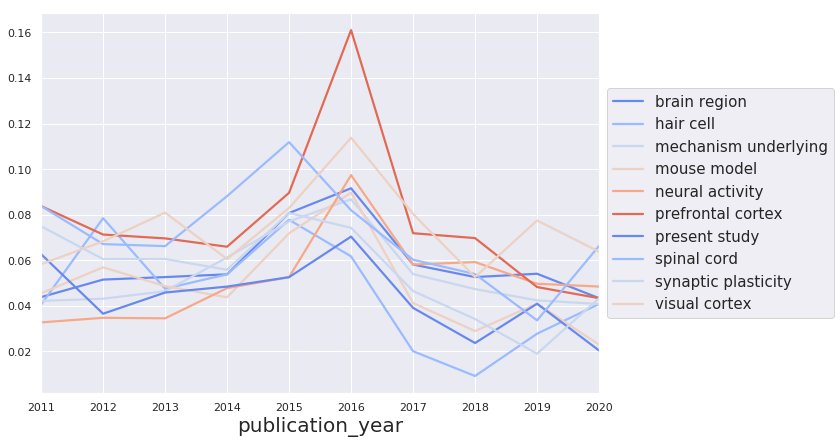

In [21]:
divided_by_n_articles_bi.plot(figsize=(10,7))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## 3-3. Trigram tokens and BOW

In [22]:
# max 10 features, ngram range: 3-3
vectorizer10_trigrams = CountVectorizer(max_features=10,
                                        ngram_range=(3,3),
                                        tokenizer=get_tokens_normalized)

bag_of_words_tri = vectorizer10_trigrams.fit_transform(df_per_year.abstract)


# Bow feature names as a list
print('Feature names of the bow vectors:')
print(vectorizer10_trigrams.get_feature_names())

Feature names of the bow vectors:
['alzheimer disease ad', 'functional magnetic resonance', 'local field potential', 'magnetic resonance imaging', 'medial prefrontal cortex', 'play critical role', 'play important role', 'primary visual cortex', 'retinal ganglion cell', 'transcranial magnetic stimulation']


In [23]:
counted_trigrams = pd.DataFrame(data=bag_of_words_tri.toarray(),
                                index=df_per_year.index,
                                columns=vectorizer10_trigrams.get_feature_names())

divided_by_n_articles_tri = counted_trigrams.div(df_per_year.n_articles, axis=0)
divided_by_n_articles_tri

,alzheimer disease ad,functional magnetic resonance,local field potential,magnetic resonance imaging,medial prefrontal cortex,play critical role,play important role,primary visual cortex,retinal ganglion cell,transcranial magnetic stimulation
publication_year,,,,,,,,,,
2011,0.024972,0.044950,0.020533,0.052719,0.016093,0.019978,0.025527,0.016093,0.011654,0.012209
2012,0.025165,0.040743,0.015578,0.045536,0.010785,0.016177,0.032355,0.015578,0.013182,0.015578
2013,0.022637,0.043577,0.018676,0.050934,0.019808,0.016978,0.029428,0.028862,0.017544,0.015846
2014,0.024226,0.024899,0.021534,0.027591,0.016824,0.017497,0.031629,0.020861,0.016824,0.012786
2015,0.025185,0.027407,0.019259,0.031852,0.023704,0.033333,0.031852,0.026667,0.008148,0.016296
2016,0.039537,0.028930,0.027965,0.033751,0.045323,0.024108,0.038573,0.042430,0.023144,0.015429
2017,0.028541,0.021142,0.013742,0.024313,0.017970,0.016913,0.027484,0.022199,0.008457,0.014799
2018,0.014474,0.015789,0.019737,0.015789,0.022368,0.014474,0.017105,0.009211,0.007895,0.011842
2019,0.023392,0.005848,0.007310,0.008772,0.010234,0.005848,0.011696,0.029240,0.011696,0.008772


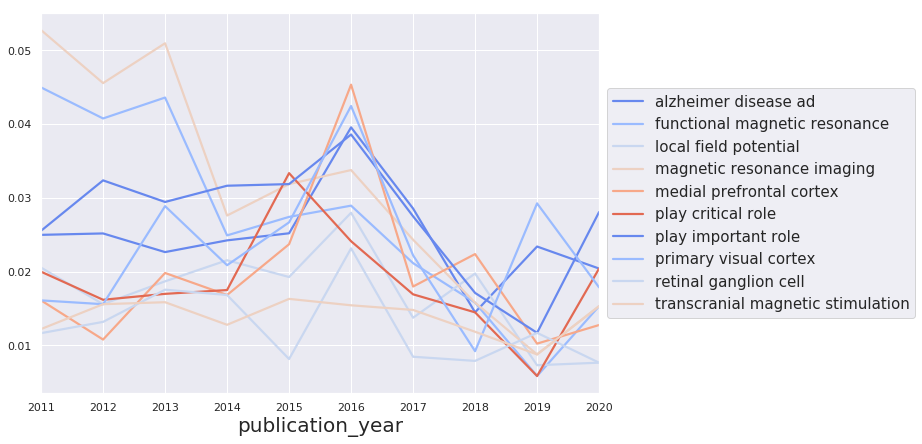

In [24]:
divided_by_n_articles_tri.plot(figsize=(10,7))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Observation
bigrams and trigrams results are better than unigram (more specific terms).
unigrams are very general terms, but too important to treat them as stopwords.

## 3-4. TF-IDF representation using bigrams & trigrams

In [44]:
# TfidfVectorizer = CountVectorizer + TFidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                   ngram_range=(2,3),
                                   tokenizer=get_tokens_normalized)
bag_of_words_multi = tfidf_vectorizer.fit_transform(df_per_year.abstract)

In [45]:
counted_tfidf = pd.DataFrame(data=bag_of_words_multi.toarray(),
                             index=df_per_year.index,
                             columns=tfidf_vectorizer.get_feature_names())

counted_tfidf

,1 2,1 receptor,2 receptor,2 week,24 h,accumbens nac,acetylcholine receptor,across different,actin cytoskeleton,action potential,...,well characterized,well established,well known,white matter,wide range,wnt signaling,working memory,wt mouse,x syndrome,young adult
publication_year,,,,,,,,,,,,,,,,,,,,,
2011,0.025397,0.056900,0.070400,0.010390,0.025289,0.027706,0.031611,0.017316,0.013909,0.111979,...,0.016438,0.024243,0.011544,0.077346,0.034633,0.013698,0.042714,0.021934,0.008081,0.017702
2012,0.013797,0.015112,0.025496,0.005017,0.027476,0.022576,0.024728,0.015051,0.015112,0.092814,...,0.019233,0.026339,0.026339,0.061458,0.017559,0.008268,0.061458,0.018814,0.005017,0.020607
2013,0.010798,0.009199,0.001742,0.015597,0.022340,0.017997,0.019712,0.007199,0.013141,0.083985,...,0.019712,0.029995,0.019197,0.075587,0.029995,0.017401,0.059990,0.031195,0.010798,0.018398
2014,0.008568,0.000000,0.002073,0.019992,0.012513,0.019992,0.017205,0.012852,0.012513,0.131378,...,0.017205,0.019992,0.025704,0.072829,0.015708,0.022593,0.077113,0.018564,0.008568,0.018770
2015,0.011279,0.006863,0.001820,0.008773,0.019218,0.018799,0.021963,0.020052,0.009609,0.091487,...,0.017845,0.023812,0.015039,0.068928,0.016292,0.008262,0.110285,0.035091,0.013786,0.019218
2016,0.005427,0.001486,0.001970,0.023063,0.026747,0.029846,0.019317,0.009497,0.016345,0.071903,...,0.014860,0.024420,0.016280,0.043413,0.032560,0.048294,0.156015,0.005427,0.010853,0.026747
2017,0.005292,0.008695,0.000000,0.013230,0.017390,0.015877,0.002898,0.010584,0.000000,0.068798,...,0.005797,0.023815,0.007938,0.068798,0.026461,0.000000,0.119074,0.018523,0.015877,0.031881
2018,0.006170,0.006758,0.000000,0.003085,0.006758,0.021594,0.013515,0.024679,0.020273,0.067867,...,0.020273,0.030848,0.015424,0.027764,0.021594,0.000000,0.114139,0.006170,0.009255,0.003379
2019,0.006999,0.011500,0.000000,0.013999,0.011500,0.031497,0.007666,0.013999,0.007666,0.069994,...,0.011500,0.020998,0.020998,0.024498,0.013999,0.000000,0.083992,0.006999,0.017498,0.026833


In [46]:
# top ngram tokens per year

counted_tfidf.idxmax(axis=1)

publication_year
2011         prefrontal cortex
2012                 hair cell
2013             visual cortex
2014               spinal cord
2015    significance statement
2016         prefrontal cortex
2017             visual cortex
2018               male female
2019               male female
2020               male female
dtype: object

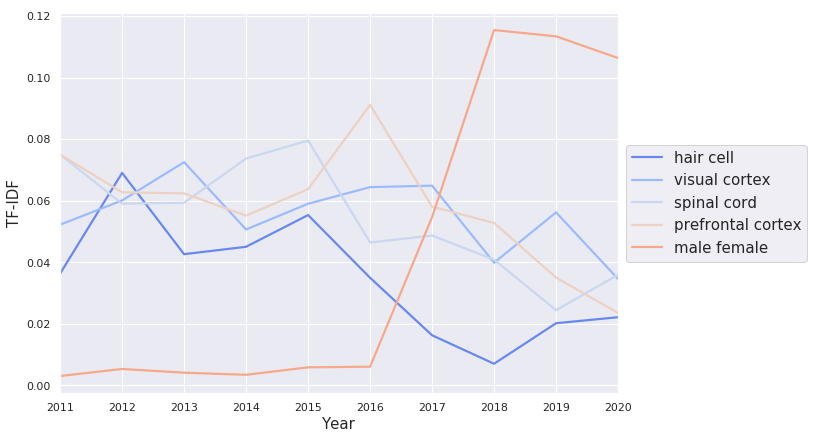

In [28]:
# Let's track how the appearance of these keywords changed over the last 10 years


keywords = [v for v in counted_tfidf.idxmax(axis=1).values if v != 'significance statement']

counted_tfidf[set(keywords)].plot(figsize=(10,7))
plt.ylabel('TF-IDF', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [29]:
# Find top N most frequent words of each year

def n_most_frequent(df, n):
    most_frequents = pd.Series()
    
    for x in range(0,n):
        if len(most_frequents) <= x*10:
            top = df.idxmax(axis=1)
            most_frequents = most_frequents.append(top)
            df = df.drop(top.values, axis=1)
            
    return most_frequents

In [30]:
three_most_frequents = n_most_frequent(counted_tfidf, 3)
three_most_frequents

2011          prefrontal cortex
2012                  hair cell
2013              visual cortex
2014                spinal cord
2015     significance statement
2016          prefrontal cortex
2017              visual cortex
2018                male female
2019                male female
2020                male female
2011        synaptic plasticity
2012                firing rate
2013        synaptic plasticity
2014           action potential
2015               brain region
2016             working memory
2017               brain region
2018                   male rat
2019                  mouse sex
2020          male female human
2011              present study
2012           transgenic mouse
2013         magnetic resonance
2014       mechanism underlying
2015    functional connectivity
2016            neural activity
2017            neural activity
2018                 male mouse
2019                 male mouse
2020               female mouse
dtype: object

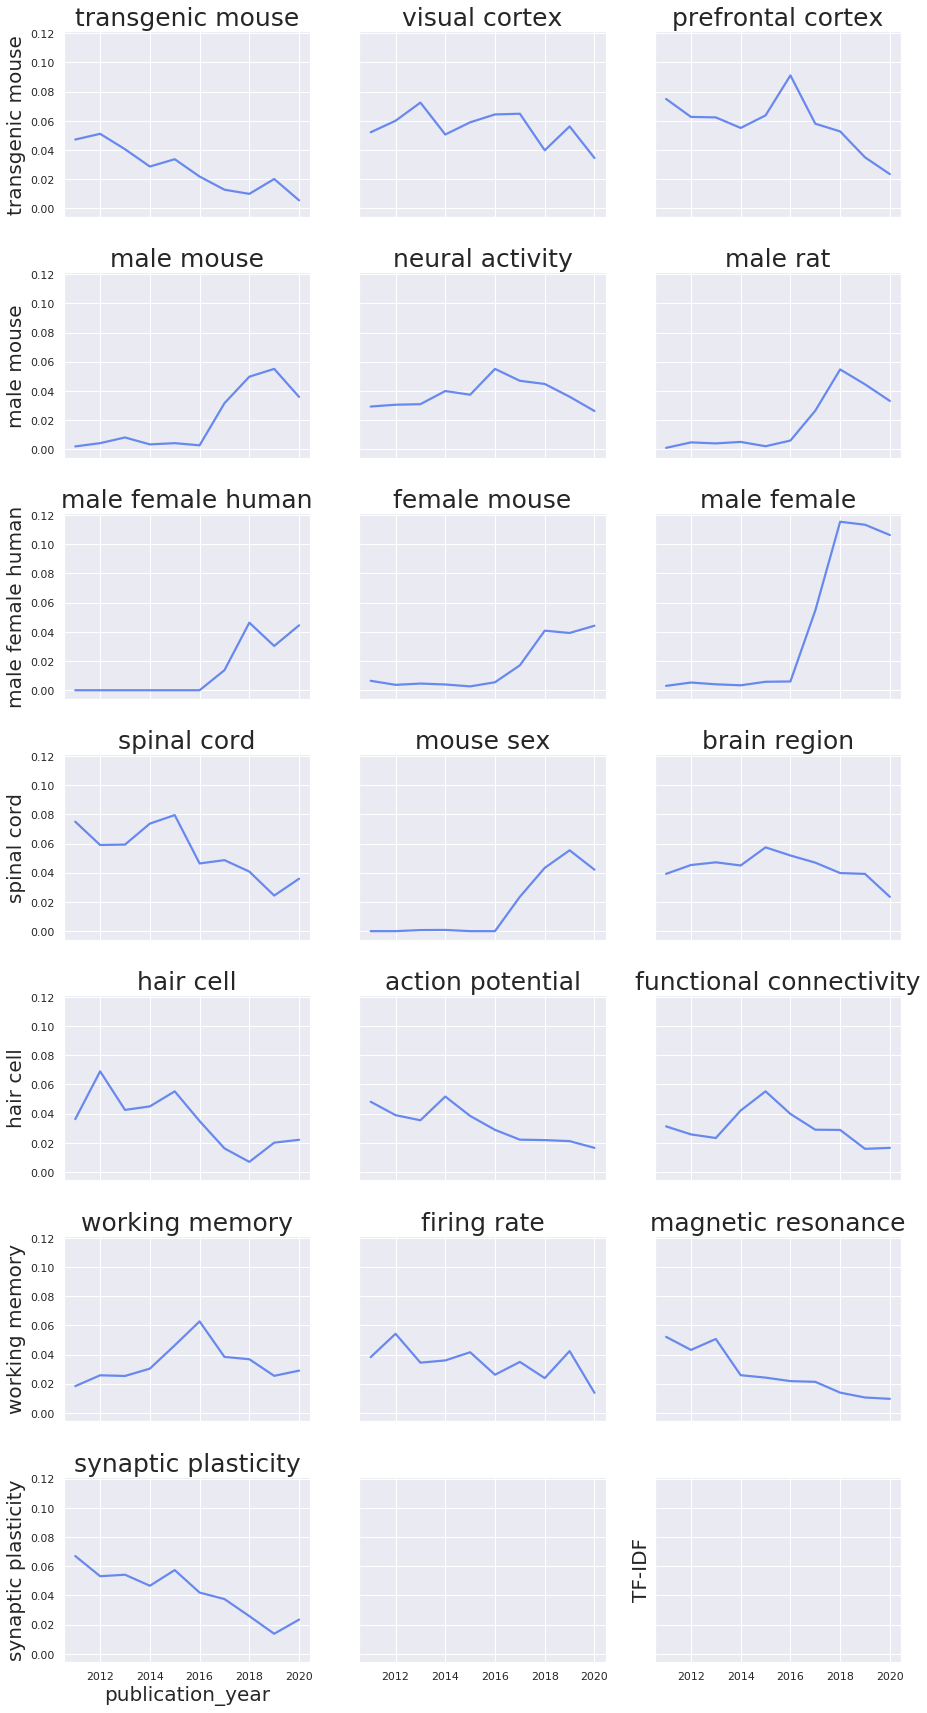

In [33]:
# Let's track how the appearance of these keywords changed over the last 10 years

not_interesting = ['significance statement',
                   'present study',
                   'mechanism underlying']

three_keywords_per_year = [v for v in three_most_frequents.values if v not in not_interesting]

fig, ax = plt.subplots(7, 3, sharex=True, sharey=True, figsize=(15,30), linewidth=2.5)
plt.subplots_adjust(hspace=.3, wspace=.2)

for i, variable in enumerate(set(three_keywords_per_year)):
    g = sns.lineplot(x=counted_tfidf.index,
                     y=counted_tfidf[variable],
                     ax=ax[int(i/3), i%3])
    g.set_title(f'{variable}')
    

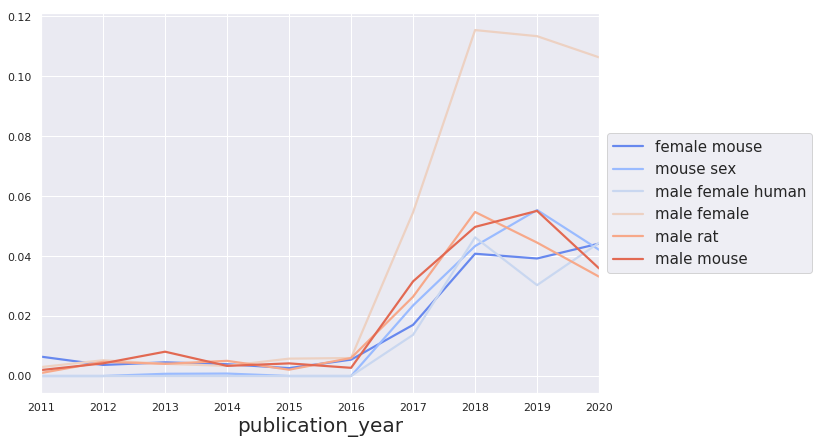

In [32]:
animal_sex = ['female mouse',
              'mouse sex',
              'male female human',
              'male female',
              'male rat',
              'male mouse']


counted_tfidf[animal_sex].plot(figsize=(10,7))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [43]:
# the_rest = [col for col in set(three_keywords_per_year) if col not in animal_sex]
# counted_tfidf[the_rest].plot(figsize=(10,7))
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<br>
<br>

# Conclusion (2020-08-14)

- Abstracts from Journal of Neuroscience (2011.Jan - 2020.Aug) was extracted and preprocessed.
- Unlike single word tokens, bigrams and trigrams provided more specific terms related to the topic.
- In the last 3 years, the most frequenlty appeared terms were 'male female'.
- Traditional research topics (perception, decision making, neural activity monitoring) are steady-selling, but some of these topic seem to be losing their poluarity.